#deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Memanggil dataset

In [2]:
df = pd.read_csv('skoda.csv')

Deskripsi dataset

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   tax           6267 non-null   int64  
 7   mpg           6267 non-null   float64
 8   engineSize    6267 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 440.8+ KB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,117.407053,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,53.267949,12.037576,0.394800
min,2004.000000,995.000000,5.000000,0.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,125.000000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,145.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,145.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,325.000000,201.800000,2.500000


VISUALISASI DATA

<AxesSubplot:>

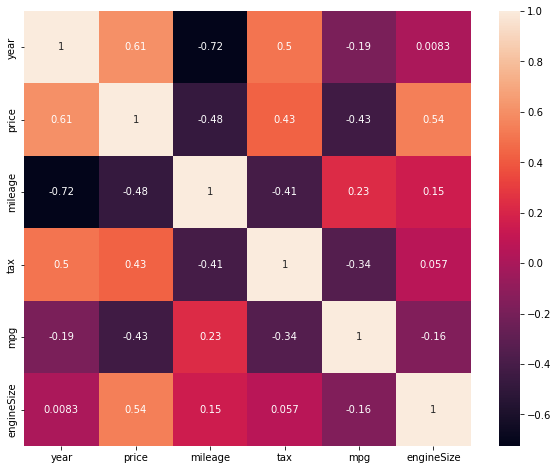

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

JUMLAH MOBIL BERDASARKAN MODEL

In [7]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax': 'NumberofCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, ' Roomster'),
  Text(1, 0, ' Yeti'),
  Text(2, 0, ' Kamiq'),
  Text(3, 0, ' Rapid'),
  Text(4, 0, ' Scala'),
  Text(5, 0, ' Karoq'),
  Text(6, 0, ' Yeti Outdoor'),
  Text(7, 0, ' Citigo'),
  Text(8, 0, ' Kodiaq'),
  Text(9, 0, ' Superb'),
  Text(10, 0, ' Octavia'),
  Text(11, 0, ' Fabia')])

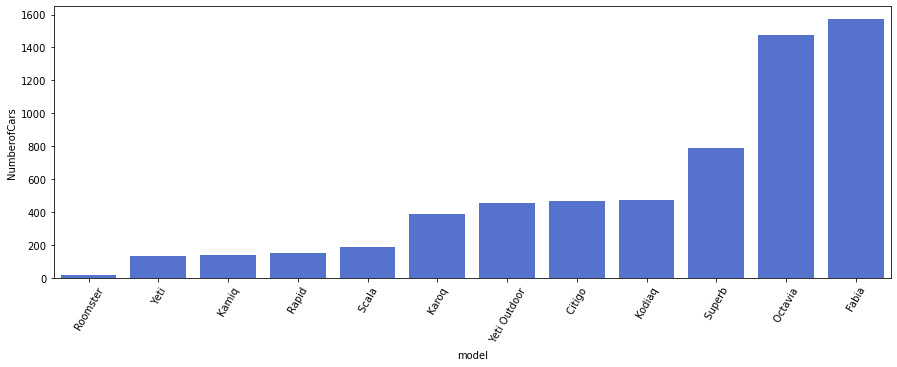

In [8]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['NumberofCars'], color='royalblue')
plt.xticks(rotation=60)

UKURAN MESIN

In [9]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<AxesSubplot:xlabel='engineSize', ylabel='count'>

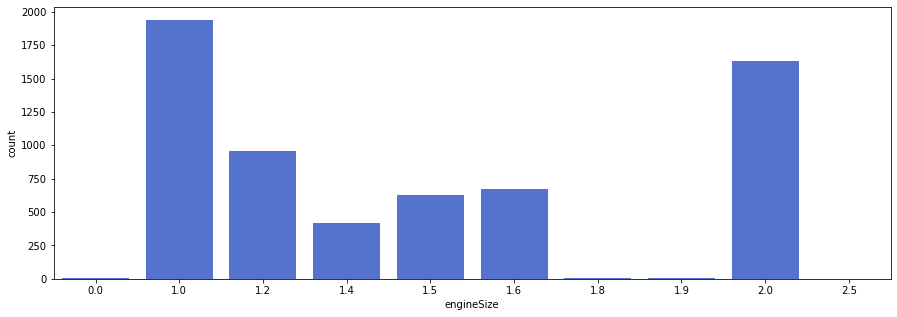

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

DISTRIBUSI MILEAGE

c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

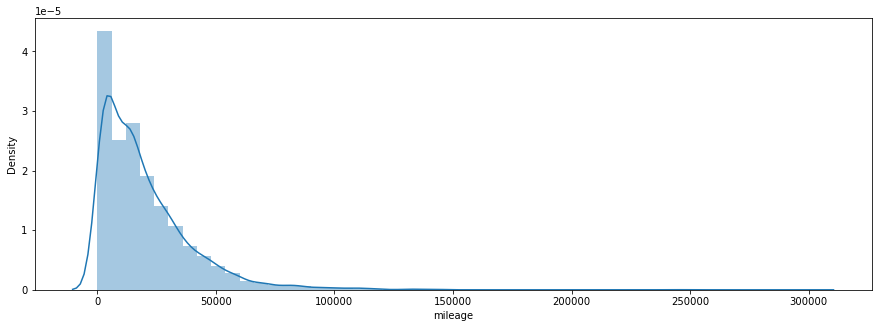

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

DISTRIBUSI HARGA MOBIL

c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

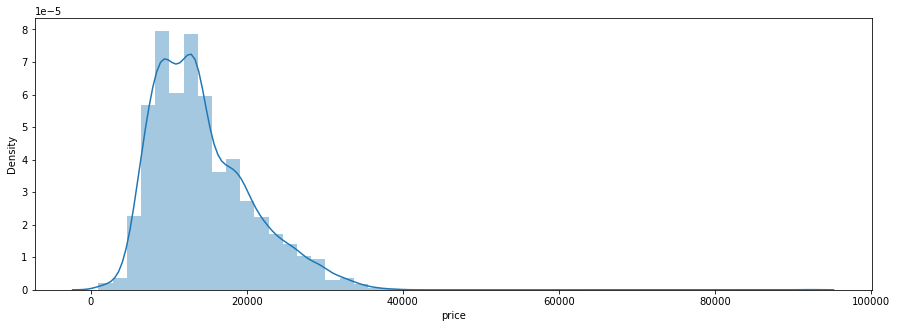

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

SELEKSI FITUR

In [13]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6267, 5), (6267,))

SPLIT DATA TRAINING DAN DATA TESTING

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1567,)

MODEL REGRESI LINIER

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [16]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7341275772658513


INPUT MODEL REGRESI LINIER

In [17]:
#year=2019, mileage=5000, tax=45, mpg=30, enginesize=2
input_data = np.array([[2019, 5000, 145, 30, 2]])

prediction = lr.predict(input_data)
print('Estimasi Harga: ', prediction)

Estimasi Harga:  [25382.19799665]


c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


SAVING MODEL PICKLE

In [33]:
import pickle

filename = 'Skoda.sav'
pickle.dump(lr, open(filename, 'wb'))